In [37]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from xata.client import XataClient


In [10]:
xata = XataClient(
   
)


In [11]:
def load_data():
    trades = []

    records = xata.data().query("trades_v1", {
        "page": {
            "size": 1000
        }
    })

    trades.extend(records["records"])

    while records.has_more_results():
        records = xata.data().query("trades_v1", {
            "page": {
                "after": records.get_cursor(),
                "size": 1000
            }
        })
        trades.extend(records["records"])

    df = pd.DataFrame(trades)
    df = df.drop(["xata", "id"], axis=1)
    return df


trades = []

records = xata.data().query("trades_v1", {
    "page": {
        "size": 1000
    }
})

trades.extend(records["records"])

while records.has_more_results():
    records = xata.data().query("trades_v1", {
        "page": {
            "after": records.get_cursor(),
            "size": 1000
        }
    })
    trades.extend(records["records"])

df = pd.DataFrame(trades)
df = df.drop(["xata", "id"], axis=1)


In [12]:
records

{'meta': {'page': {'cursor': 'TMoxDsIwDAXQnWP8uYNTFpSrIISCmxqnCRF2mBB3R8DC-KRXwhPebSAeoQtOE1Y1_9Iyn7kvTtRT21o4SLFHvskn1fR_ssxhu9CdefZx3afyO9p0IAYimrDWJI5Ir907AAD__w',
   'more': False,
   'size': 1000}},
 'records': [{'brokerage': 0,
   'buy_time': '09:15:46',
   'buy_value': 4975,
   'date': '2023-12-15T00:00:00Z',
   'id': 'rec_cods00oamkm18gjrueng',
   'net_pnl': -64.29,
   'pnl': -62.5,
   'sell_time': '15:10:24',
   'sell_value': 4912.5,
   'strategy': 'MEAN_REVERSION',
   'symbol': 'MOTHERSON',
   'tax': 1.79,
   'traded_qty': 50,
   'xata': {'createdAt': '2024-04-14T11:37:38.663516Z',
    'updatedAt': '2024-04-14T11:37:38.663516Z',
    'version': 0}},
  {'brokerage': 0,
   'buy_time': '15:10:40',
   'buy_value': 5338.4,
   'date': '2022-11-23T00:00:00Z',
   'id': 'rec_cods00oamkm18gjrueo0',
   'net_pnl': 101.63,
   'pnl': 103.6,
   'sell_time': '09:17:52',
   'sell_value': 5442,
   'strategy': 'MEAN_REVERSION',
   'symbol': 'SRTRANSFIN',
   'tax': 1.97,
   'traded_qty': 4,
   'x

In [13]:
df

,brokerage,buy_time,buy_value,date,net_pnl,pnl,sell_time,sell_value,strategy,symbol,tax,traded_qty
0,0.0,09:15:46,4179.95,2024-01-10T00:00:00Z,3.13,4.65,15:10:23,4184.60,MEAN_REVERSION,SIEMENS,1.52,1
1,0.0,09:15:49,4946.40,2024-01-10T00:00:00Z,-118.76,-117.00,12:06:07,4829.40,SWING_STOCHASTIC_RSI,GRANULES,1.76,12
2,0.0,09:15:27,4979.70,2024-01-11T00:00:00Z,16.88,18.70,15:10:24,4998.40,SWING_STOCHASTIC_RSI,CANBK,1.82,11
3,0.0,09:37:14,4617.60,2024-01-11T00:00:00Z,-45.77,-44.10,15:10:24,4573.50,SWING_STOCHASTIC_RSI,SBICARD,1.67,6
4,0.0,09:15:55,4960.80,2024-01-11T00:00:00Z,-27.80,-26.00,15:10:24,4934.80,SWING_STOCHASTIC_RSI,PNB,1.80,52
...,...,...,...,...,...,...,...,...,...,...,...,...
2479,0.0,15:10:40,6156.10,2023-02-06T00:00:00Z,-28.73,-26.50,09:23:02,6129.60,MEAN_REVERSION,SIEMENS,2.23,2
2480,0.0,15:10:39,5664.30,2023-02-06T00:00:00Z,-5.96,-3.90,09:45:56,5660.40,MEAN_REVERSION,DALBHARAT,2.06,3
2481,0.0,09:15:46,4825.20,2024-04-15T00:00:00Z,73.82,75.60,15:10:23,4900.80,MEAN_REVERSION,EXIDEIND,1.78,12
2482,0.0,09:15:46,4819.75,2024-04-15T00:00:00Z,-19.62,-17.87,15:10:23,4801.88,MEAN_REVERSION,VEDL,1.75,13


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   brokerage   2484 non-null   float64
 1   buy_time    2484 non-null   object 
 2   buy_value   2484 non-null   float64
 3   date        2484 non-null   object 
 4   net_pnl     2484 non-null   float64
 5   pnl         2484 non-null   float64
 6   sell_time   2484 non-null   object 
 7   sell_value  2484 non-null   float64
 8   strategy    2484 non-null   object 
 9   symbol      2484 non-null   object 
 10  tax         2484 non-null   float64
 11  traded_qty  2484 non-null   int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 233.0+ KB


In [38]:
df=pd.read_csv('../data/trades_v1.csv')

In [3]:
df

,strategy,sell_time,symbol,tax,sell_value,pnl,brokerage,traded_qty,buy_value,buy_time,net_pnl,date
0,MEAN_REVERSION,10:04:00,APOLLOHOSP,2.20,4641.90,-91.35,2.84,1,4733.25,09:15:00,-96.39,2022-02-23T00:00:00.000000Z
1,MEAN_REVERSION,03:14:00,NATIONALUM,2.31,4909.80,35.70,2.92,42,4874.10,09:15:00,30.47,2022-02-23T00:00:00.000000Z
2,MEAN_REVERSION,09:52:00,METROPOLIS,1.96,4127.80,-82.20,2.53,2,4210.00,09:15:00,-86.69,2022-02-23T00:00:00.000000Z
3,MEAN_REVERSION,03:14:00,NAM-INDIA,2.24,4782.00,104.25,2.81,15,4677.75,09:22:00,99.21,2022-02-23T00:00:00.000000Z
4,MEAN_REVERSION,03:06:00,CROMPTON,2.32,4951.20,89.40,2.92,12,4861.80,09:22:00,84.16,2022-02-24T00:00:00.000000Z
...,...,...,...,...,...,...,...,...,...,...,...,...
2476,MEAN_REVERSION,15:10:24,MCDOWELL-N,1.72,4727.00,-63.60,0.00,4,4790.60,09:15:46,-65.32,2024-04-12T00:00:00.000000Z
2477,MEAN_REVERSION,15:10:24,INDIGO,1.35,3696.50,-99.30,0.00,1,3795.80,09:15:46,-100.65,2024-04-12T00:00:00.000000Z
2478,MEAN_REVERSION,15:10:24,IDFC,1.75,4814.55,-21.45,0.00,39,4836.00,09:15:46,-23.20,2024-04-12T00:00:00.000000Z
2479,MEAN_REVERSION,15:10:24,VEDL,1.76,4864.60,135.20,0.00,13,4729.40,09:15:46,133.44,2024-04-12T00:00:00.000000Z


In [15]:
df.describe()

,brokerage,buy_value,net_pnl,pnl,sell_value,tax,traded_qty
count,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000
mean,0.754875,5364.658772,-3.116385,-0.276208,5364.382564,2.085330,15.919485
std,1.371332,1255.389467,92.285806,92.262845,1253.120208,0.522103,19.622637
min,0.000000,346.000000,-319.500000,-316.000000,346.950000,0.130000,1.000000
25%,0.000000,4664.550000,-55.780000,-53.100000,4655.550000,1.730000,3.000000
50%,0.000000,4981.525000,-6.530000,-3.750000,4989.550000,2.120000,8.000000
75%,0.000000,6312.375000,44.822500,47.412500,6319.087500,2.370000,20.000000
max,3.980000,12317.900000,753.830000,759.500000,12293.200000,4.470000,128.000000


In [16]:
df["date"] = pd.to_datetime(df["date"]).dt.date

In [17]:
daily_df=df.groupby('date')["net_pnl"].sum().reset_index().set_index('date')

In [18]:
daily_df.index = pd.to_datetime(daily_df.index)

In [19]:
daily_df["cum_pnl"]=daily_df["net_pnl"].cumsum()

<Axes: xlabel='date'>

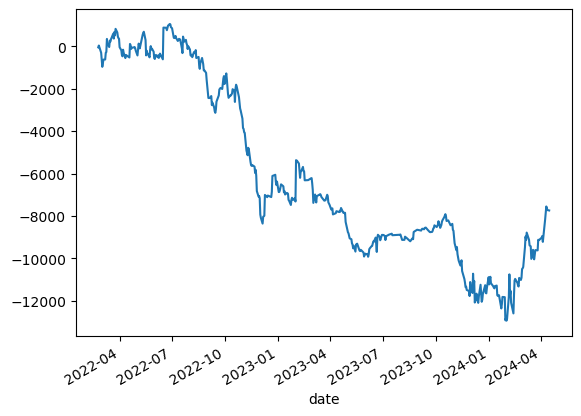

In [20]:
daily_df["cum_pnl"].plot()

In [21]:
daily_df.tail(30)["net_pnl"]

date
2024-02-23    406.22
2024-02-26    -96.17
2024-02-27    105.36
2024-02-28    410.04
2024-02-29     33.38
2024-03-01     62.41
2024-03-04    933.79
2024-03-05    497.79
2024-03-06   -154.47
2024-03-07    343.30
2024-03-11   -334.25
2024-03-12   -269.88
2024-03-14    -42.01
2024-03-15   -591.95
2024-03-18    424.70
2024-03-19   -376.20
2024-03-20    -72.08
2024-03-21    238.82
2024-03-22    198.49
2024-03-26    -14.94
2024-03-27    499.53
2024-03-28    -23.24
2024-04-02    124.15
2024-04-03     76.39
2024-04-04   -274.42
2024-04-05    260.67
2024-04-08    797.55
2024-04-10    609.76
2024-04-12   -171.40
2024-04-15    -17.70
Name: net_pnl, dtype: float64

In [22]:
daily_df.index

DatetimeIndex(['2022-02-23', '2022-02-24', '2022-02-28', '2022-03-02',
               '2022-03-04', '2022-03-07', '2022-03-08', '2022-03-09',
               '2022-03-10', '2022-03-11',
               ...
               '2024-03-27', '2024-03-28', '2024-04-02', '2024-04-03',
               '2024-04-04', '2024-04-05', '2024-04-08', '2024-04-10',
               '2024-04-12', '2024-04-15'],
              dtype='datetime64[ns]', name='date', length=444, freq=None)

In [23]:
monthly_df=daily_df.resample("M").sum()
monthly_df["cum_pnl"]=monthly_df["net_pnl"].cumsum()
monthly_df

,net_pnl,cum_pnl
date,,
2022-02-28,-308.74,-308.74
2022-03-31,661.19,352.45
2022-04-30,-561.68,-209.23
2022-05-31,-337.81,-547.04
2022-06-30,1443.11,896.07
2022-07-31,-898.80,-2.73
2022-08-31,-1595.03,-1597.76
2022-09-30,-184.17,-1781.93
2022-10-31,-1631.43,-3413.36


In [24]:
px.bar(monthly_df,x=monthly_df.index,y="net_pnl")

In [25]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=monthly_df.index,
                     y=monthly_df["net_pnl"],
                     text=round(monthly_df["net_pnl"], 0),

                     ), secondary_y=False)

# add a line chart as the second trace with different axis
fig.add_trace(go.Scatter(x=monthly_df.index,
              y=monthly_df["cum_pnl"]), secondary_y=True)


fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Monthly PnL",


    legend_orientation="h",
    legend_yanchor="bottom",
    legend_xanchor="auto",
)


fig.show()

In [26]:
fig = go.Figure()

fig.add_trace(go.Bar(x=monthly_df.index,
                     y=monthly_df["net_pnl"],
                     text=round(monthly_df["net_pnl"], 0),
                    marker_color= []
                     ))




fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Monthly PnL",


    legend_orientation="h",
    legend_yanchor="bottom",
    legend_xanchor="auto",
)


fig.show()

In [27]:
options = ['INTRADAY_GAP_UP', 'SWING_STOCHASTIC_RSI']

In [28]:
df[df["strategy"].isin(options)]

,brokerage,buy_time,buy_value,date,net_pnl,pnl,sell_time,sell_value,strategy,symbol,tax,traded_qty
1,0.0,09:15:49,4946.40,2024-01-10,-118.76,-117.0,12:06:07,4829.40,SWING_STOCHASTIC_RSI,GRANULES,1.76,12
2,0.0,09:15:27,4979.70,2024-01-11,16.88,18.7,15:10:24,4998.40,SWING_STOCHASTIC_RSI,CANBK,1.82,11
3,0.0,09:37:14,4617.60,2024-01-11,-45.77,-44.1,15:10:24,4573.50,SWING_STOCHASTIC_RSI,SBICARD,1.67,6
4,0.0,09:15:55,4960.80,2024-01-11,-27.80,-26.0,15:10:24,4934.80,SWING_STOCHASTIC_RSI,PNB,1.80,52
5,0.0,09:16:01,3373.40,2024-01-11,-54.01,-52.8,14:22:39,3320.60,SWING_STOCHASTIC_RSI,BAJAJFINSV,1.21,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2453,0.0,15:10:40,6920.00,2023-01-27,-23.51,-21.0,10:15:18,6899.00,INTRADAY_GAP_UP,ITC,2.51,20
2454,0.0,10:30:28,6711.75,2023-01-27,-47.43,-45.0,10:15:18,6666.75,INTRADAY_GAP_UP,TATAMOTORS,2.43,15
2460,0.0,15:10:40,6855.00,2023-01-31,33.50,36.0,10:15:19,6891.00,INTRADAY_GAP_UP,BPCL,2.50,20
2473,0.0,11:24:54,6561.15,2023-02-03,126.58,129.0,10:15:19,6690.15,INTRADAY_GAP_UP,INDUSINDBK,2.42,6


In [29]:
monthly_df=df.groupby(["strategy","date"])["net_pnl"].sum().reset_index().set_index(["date"])
monthly_df.index = pd.to_datetime(monthly_df.index)
monthly_df=monthly_df.groupby("strategy").resample("M").sum().drop("strategy",axis=1).reset_index().set_index("date")
# monthly_df=monthly_df.reset_index()

In [30]:
monthly_df

,strategy,net_pnl
date,,
2022-10-31,INTRADAY_GAP_UP,190.65
2022-11-30,INTRADAY_GAP_UP,129.14
2022-12-31,INTRADAY_GAP_UP,102.72
2023-01-31,INTRADAY_GAP_UP,-280.74
2023-02-28,INTRADAY_GAP_UP,72.38
2023-03-31,INTRADAY_GAP_UP,53.17
2023-04-30,INTRADAY_GAP_UP,-223.08
2023-05-31,INTRADAY_GAP_UP,-183.05
2023-06-30,INTRADAY_GAP_UP,223.77


In [31]:
fig = px.bar(monthly_df, x=monthly_df.index, y="net_pnl", 
             color="strategy", barmode = 'group')

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Monthly PnL",
    legend_orientation="h",
    legend_yanchor="top",
    legend_xanchor="auto",
    legend_y=1.1,
    legend_title_text='Strategy',
)
fig.show()

In [41]:
df["result"]=np.where(df["net_pnl"]>0,1,0)
df["winning_amount_pct"] = df["net_pnl"]*100/df["buy_value"]

In [42]:
strategy_df=df.groupby(["strategy"]).agg({"result":["sum", "count"], "winning_amount_pct":["mean", "max","min"]})
strategy_df

result       winning_amount_pct                     
                        sum count               mean        max       min
strategy                                                                 
INTRADAY_GAP_UP         183   392           0.064228   4.467906 -2.280420
MEAN_REVERSION          815  1754          -0.046950  14.835377 -3.156439
SWING_STOCHASTIC_RSI    148   335          -0.067997   5.158182 -3.231189

In [43]:
strategy_df.columns= ["win","total", "mean_pct","max_pct","min_pct"]
strategy_df["win_rate"]=(strategy_df["win"]*100)/strategy_df["total"]
strategy_df

,win,total,mean_pct,max_pct,min_pct,win_rate
strategy,,,,,,
INTRADAY_GAP_UP,183,392,0.064228,4.467906,-2.280420,46.683673
MEAN_REVERSION,815,1754,-0.046950,14.835377,-3.156439,46.465222
SWING_STOCHASTIC_RSI,148,335,-0.067997,5.158182,-3.231189,44.179104


In [45]:
strategy_df.loc["MEAN_REVERSION"]["total"]

1754.0

In [35]:
df

,brokerage,buy_time,buy_value,date,net_pnl,pnl,sell_time,sell_value,strategy,symbol,tax,traded_qty,result,winning_ammount_pct
0,0.0,09:15:46,4179.95,2024-01-10,3.13,4.65,15:10:23,4184.60,MEAN_REVERSION,SIEMENS,1.52,1,1,0.074881
1,0.0,09:15:49,4946.40,2024-01-10,-118.76,-117.00,12:06:07,4829.40,SWING_STOCHASTIC_RSI,GRANULES,1.76,12,0,-2.400938
2,0.0,09:15:27,4979.70,2024-01-11,16.88,18.70,15:10:24,4998.40,SWING_STOCHASTIC_RSI,CANBK,1.82,11,1,0.338976
3,0.0,09:37:14,4617.60,2024-01-11,-45.77,-44.10,15:10:24,4573.50,SWING_STOCHASTIC_RSI,SBICARD,1.67,6,0,-0.991208
4,0.0,09:15:55,4960.80,2024-01-11,-27.80,-26.00,15:10:24,4934.80,SWING_STOCHASTIC_RSI,PNB,1.80,52,0,-0.560393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,0.0,15:10:40,6156.10,2023-02-06,-28.73,-26.50,09:23:02,6129.60,MEAN_REVERSION,SIEMENS,2.23,2,0,-0.466692
2480,0.0,15:10:39,5664.30,2023-02-06,-5.96,-3.90,09:45:56,5660.40,MEAN_REVERSION,DALBHARAT,2.06,3,0,-0.105220
2481,0.0,09:15:46,4825.20,2024-04-15,73.82,75.60,15:10:23,4900.80,MEAN_REVERSION,EXIDEIND,1.78,12,1,1.529885
2482,0.0,09:15:46,4819.75,2024-04-15,-19.62,-17.87,15:10:23,4801.88,MEAN_REVERSION,VEDL,1.75,13,0,-0.407075
